
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the S&P 500.  Construct portfolios from the 500 stocks in the S&P 500 large cap index and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['sp500-galaxy']
risk_free_rate = 0
annual_returns = '1 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,MMM,3M Company,US Stocks:Industrials,43.26,73.71,31.04,4.19,7.28,16.66,10.17,22.06,31.04,1.41
1,ABT,Abbott Laboratories,US Stocks:Healthcare,-62.16,-23.40,25.70,22.10,24.86,35.90,32.11,20.27,25.70,1.27
2,ABBV,AbbVie Inc.,US Stocks:Healthcare,-30.22,29.06,26.88,9.74,16.66,13.63,9.23,28.70,26.88,0.94
3,ABMD,Abiomed,US Stocks:Healthcare,-36.79,-14.67,22.66,-10.65,23.23,29.27,21.28,45.54,22.66,0.50
4,ACN,Accenture,US Stocks:Technology,-23.37,67.96,41.40,22.90,20.88,17.62,11.44,23.59,41.40,1.75
5,ATVI,Activision Blizzard,US Stocks:Communication Services,138.30,22.05,39.39,10.70,20.88,22.16,11.96,29.83,39.39,1.32
6,ADBE,Adobe Inc.,US Stocks:Technology,53.92,71.54,30.77,25.81,38.17,24.00,12.73,23.12,30.77,1.33
7,AMD,Advanced Micro Devices,US Stocks:Technology,75.89,16.52,55.01,76.45,80.65,27.23,17.28,54.88,55.01,1.00
8,AAP,Advance Auto Parts,US Stocks:Consumer Discretionary,-45.66,60.43,36.40,14.51,5.17,23.63,14.79,35.97,36.40,1.01
9,AES,AES Corp,US Stocks:Utilities,-50.58,-13.07,85.60,28.59,22.48,22.47,12.03,27.80,85.60,3.08


In [6]:
# Rank
#rank = bb.rank(df, rank_by='Sharpe Ratio')
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Subclass', num_per_group=2)
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
9,AES,AES Corp,US Stocks:Utilities,-50.58,-13.07,85.60,28.59,22.48,22.47,12.03,27.80,85.60,3.08
96,CNP,CenterPoint Energy,US Stocks:Utilities,85.73,134.48,44.63,3.34,6.32,19.53,9.40,30.14,44.63,1.48
46,AMAT,Applied Materials Inc.,US Stocks:Technology,138.85,132.52,142.98,40.92,43.64,48.93,31.14,39.80,142.98,3.59
280,LRCX,Lam Research,US Stocks:Technology,131.67,106.93,127.44,50.34,53.53,47.84,30.85,38.04,127.44,3.35
183,EXR,Extra Space Storage,US Stocks:Real Estate,94.59,148.08,57.16,20.06,14.64,16.85,9.68,20.09,57.16,2.85
258,IRM,Iron Mountain Incorporated,US Stocks:Real Estate,622.77,183.63,70.42,18.45,11.82,24.84,13.02,25.19,70.42,2.80
204,FCX,Freeport-McMoRan Inc.,US Stocks:Materials,5.63,103.42,310.03,35.73,32.27,49.15,28.76,52.80,310.03,5.87
346,NUE,Nucor Corp.,US Stocks:Materials,570.39,812.01,151.52,22.06,20.71,51.10,28.35,39.31,151.52,3.85
208,GNRC,Generac Holdings,US Stocks:Industrials,34.92,29.30,196.21,86.60,54.18,40.75,29.03,35.03,196.21,5.60
138,DE,Deere & Co.,US Stocks:Industrials,-51.58,9.08,124.41,35.36,36.11,24.11,17.99,28.90,124.41,4.30


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': 'DS Vola'},
    'Investment Option': {'weight_by': 'Annual Returns'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,AES,CNP,AMAT,LRCX,EXR,IRM,FCX,NUE,GNRC,DE,...,SIVB,DVN,MRO,ADM,HSY,LB,F,IPG,GOOG,Ranked Portfolio
Annual Returns,85.60,44.63,142.98,127.44,57.16,70.42,310.03,151.52,196.21,124.41,...,167.06,164.77,124.21,71.87,33.84,268.94,143.07,89.36,73.62,125.37
Std Dev,27.80,30.14,39.80,38.04,20.09,25.19,52.80,39.31,35.03,28.90,...,46.69,80.05,83.49,22.70,17.17,68.46,40.46,28.67,24.03,28.50
Sharpe Ratio,3.08,1.48,3.59,3.35,2.85,2.80,5.87,3.85,5.60,4.30,...,3.58,2.06,1.49,3.17,1.97,3.93,3.54,3.12,3.06,4.40
Weight,0.06,0.03,0.04,0.03,0.04,0.05,0.05,0.03,0.05,0.03,...,0.04,0.03,0.02,0.10,0.05,0.04,0.02,0.05,0.04,1.00
Worst Typical Down Year,30.00,-15.65,63.38,51.36,16.98,20.04,204.43,72.90,126.15,66.61,...,73.68,4.67,-42.77,26.47,-0.50,132.02,62.15,32.02,25.56,68.36
Black Swan,2.20,-45.79,23.58,13.32,-3.11,-5.15,151.63,33.59,91.12,37.71,...,26.99,-75.38,-126.26,3.77,-17.67,63.56,21.69,3.35,1.53,39.85


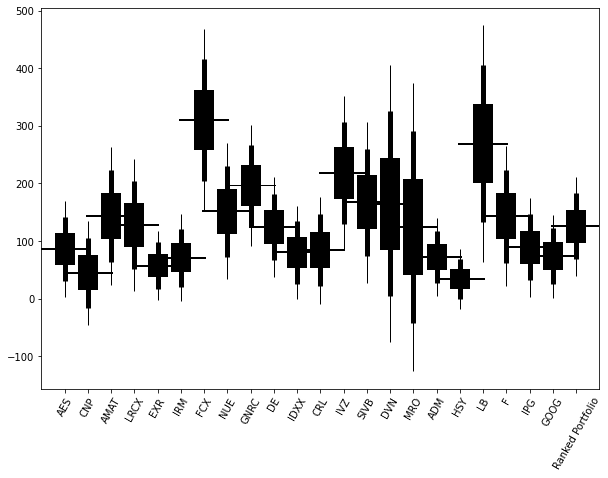

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

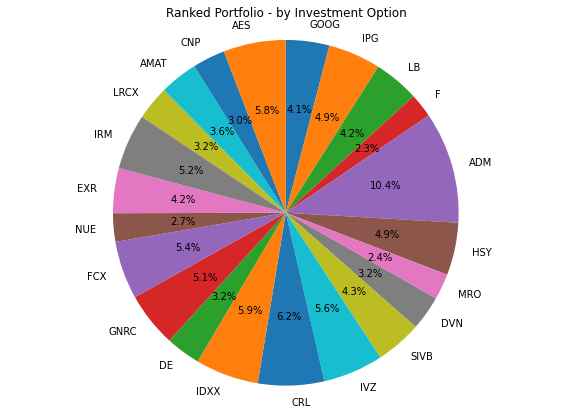

GOOG   0.04
IPG    0.05
LB     0.04
F      0.02
ADM    0.10
HSY    0.05
MRO    0.02
DVN    0.03
SIVB   0.04
IVZ    0.06
CRL    0.06
IDXX   0.06
DE     0.03
GNRC   0.05
FCX    0.05
NUE    0.03
EXR    0.04
IRM    0.05
LRCX   0.03
AMAT   0.04
CNP    0.03
AES    0.06



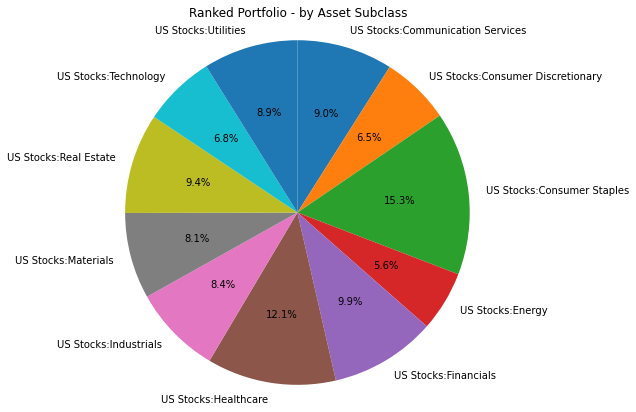

US Stocks:Communication Services   0.09
US Stocks:Consumer Discretionary   0.06
US Stocks:Consumer Staples         0.15
US Stocks:Energy                   0.06
US Stocks:Financials               0.10
US Stocks:Healthcare               0.12
US Stocks:Industrials              0.08
US Stocks:Materials                0.08
US Stocks:Real Estate              0.09
US Stocks:Technology               0.07
US Stocks:Utilities                0.09



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    AES                            0.0583
    CNP                            0.0304
    AMAT                           0.0357
    LRCX                           0.0319
    EXR                            0.0421
    IRM                            0.0519
    FCX                            0.0543
    NUE                            0.0265
    GNRC                           0.0511
    DE                             0.0324
    IDXX                           0.0592
    CRL                            0.0619
    IVZ                            0.0562
    SIVB                           0.0431
    DVN                            0.0322
    MRO                            0.0243
    ADM                            0.1043
    HSY                            0.0491
    LB                             0.0424
    F                              0.0226
    IPG                            0.0493
    GOOG                           0.0406


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer............

Ranked Portfolio Metrics:           
    max_sharpe_ratio            5.15
    annual_return             150.80
    std_dev                    29.26
    worst typical down year    92.29
    black_swan                 63.04


Ranked Portfolio Weights:
    AES                            0.1000
    CNP                            0.0000
    AMAT                           0.0600
    LRCX                           0.0000
    EXR                            0.0500
    IRM                            0.0600
    FCX                            0.1400
    NUE                            0.0000
    GNRC                           0.1100
    DE                             0.0900
    IDXX                           0.0400
    CRL                            0.0000
    IVZ                            0.0800
    SIVB                           0.0900
    DVN                            0.0000
    MRO                            0.0000
    ADM                            0.0500
    H

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).